In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#this imports matplotlib
#use magic-get plot and then display the output
#in matplot lib not jupiter you have to create plot

### Read in the public art data

In [2]:
art = pd.read_csv('../data/public_art.csv')
art.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"


In [3]:
art = art.drop(columns = ['Mapped Location'])
art = art.rename(columns = {'Title': 'title', 'Last Name': 'last_name', 
                            'First Name': 'first_name', 'Location': 'loc', 
                            'Medium': 'medium',  'Type': 'art_type', 'Description': 'desc', 
                            'Latitude': 'lat', 'Longitude': 'lng'})

In [4]:
type_counts = art.art_type.value_counts()

In [5]:
#make series a df
type_counts = type_counts.to_frame()

#reset index resets to 0-based index and moves existing index to a column
type_counts = type_counts.reset_index()

In [6]:
type_counts.columns = ['art_type', 'count']
type_counts.head(3)

,art_type,count
0,Sculpture,61
1,Mural,38
2,Monument,16


In [7]:
# map Frieze, Sculpture/Fountain, Fountain, and Relief to Sculpture
# map Street Art, mural to Mural
# map Bronzes to Monument

art.art_type = art.art_type.map({'Sculpture': 'Sculpture', 'Mural': 'Mural', 'Frieze': 'Sculpture',
             'Monument': 'Monument', 'Mobile': 'Mobile', 'Furniture': 'Furniture',
             'Mosaic': 'Mosaic', 'Relief': 'Sculpture', 'Stained Glass': 'Stained Glass',
             'Bronzes': 'Monument', 'Sculpture/Fountain': 'Sculpture',
             'Various': 'Various', 'Street Art': 'Street Art', 'mural': 'Mural',
             'Fountain': 'Sculpture', 'Multipart': 'Multipart'})
art.head(3)

,title,last_name,first_name,loc,medium,art_type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817


#### Make a horizontal barplot
 - using `matplotlib.pyplot`
 - using seaborn

#### matplotlib - https://matplotlib.org/gallery/index.html
#### seaborn - https://seaborn.pydata.org/examples/index.html


### Simplest horizontal barplot using matplotlib.pyplot

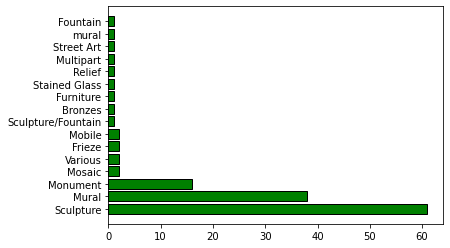

In [9]:
plt.barh('art_type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

### Fancier horizontal barplot with seaborn

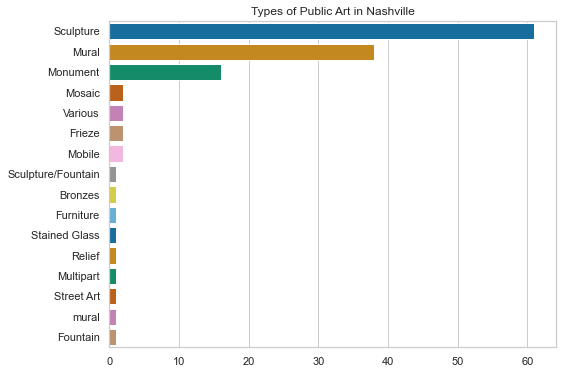

In [10]:
plt.figure(figsize = (8, 6))
sns.set(style="whitegrid")
sns.barplot('count', 'art_type', data = type_counts, palette = 'colorblind')
plt.xlabel('')
plt.ylabel('')
plt.title('Types of Public Art in Nashville');

### Steps to create an aggregated dataset:
 1. Group by the columns you want to aggregate by with `df.groupby([col1, col2])`
 2. Use the `.agg()` function to get a count for groups
 3. Keep the desired columns / drop the ones you don't need  
 4. Rename columns (use `df.sort_values()` with `ascending = False` to put the largest value first
 

In [17]:
# aggregate to get counts by type and artist
aggregated_art = art.groupby(['art_type', 'last_name', 'first_name']).agg('count').reset_index()

In [18]:
aggregated_art.head(2)

,art_type,last_name,first_name,title,loc,medium,desc,lat,lng
0,Furniture,McGraw,Deloss,1,1,1,1,1,1
1,Mobile,Emery,Lin,1,1,1,1,1,1


#### Create a dataframe that aggregates the data by artist and gives a count of the number of works by the artist

In [19]:
aggregated_art = aggregated_art[['art_type', 'last_name', 'first_name', 'title']] 
aggregated_art.columns = ['art_type', 'last_name', 'first_name','art_count']
aggregated_art = aggregated_art.sort_values('art_count', ascending = False)
aggregated_art.head()

,art_type,last_name,first_name,art_count
40,Sculpture,Faxon,Russell,9
51,Sculpture,LeQuire,Alan,6
57,Sculpture,Mims,Puryear,6
29,Mural,Rudloff,Andee,6
17,Mural,Cooper,Michael,6


In [20]:
multiple_works = aggregated_art.loc[aggregated_art.art_count > 1]
multiple_works.shape

(15, 4)

In [21]:
multiple_works.head()

,art_type,last_name,first_name,art_count
40,Sculpture,Faxon,Russell,9
51,Sculpture,LeQuire,Alan,6
57,Sculpture,Mims,Puryear,6
29,Mural,Rudloff,Andee,6
17,Mural,Cooper,Michael,6


#### For loops 

In [23]:
last_names =  list(multiple_works.last_name)
first_names = list(multiple_works.first_name)

In [24]:
first_names

['Russell',
 'Alan',
 'Puryear',
 'Andee',
 'Michael',
 'Adrien',
 'Belle and Leopold',
 'George Julian',
 'Various',
 'Bryan',
 'Joe',
 'Livin',
 'Unknown',
 'Lin',
 'Alan']

In [25]:
last_names

['Faxon',
 'LeQuire',
 'Mims',
 'Rudloff',
 'Cooper',
 'Saporiti',
 'Kinney and Scholz',
 'Zolnay',
 'Various',
 'Deese',
 'Sorci',
 'Limor',
 'Unknown',
 'Walker',
 'LeQuire']

#### We can intialize an empty list and then build and append artists' full names in a for-loop 

In [26]:
artists=[]
for i in range(len(last_names)):
    artists.append(first_names[i] + ' ' + last_names[i])
artists               

['Russell Faxon',
 'Alan LeQuire',
 'Puryear Mims',
 'Andee Rudloff',
 'Michael Cooper',
 'Adrien Saporiti',
 'Belle and Leopold Kinney and Scholz',
 'George Julian Zolnay',
 'Various Various',
 'Bryan Deese',
 'Joe Sorci',
 'Livin Limor',
 'Unknown Unknown',
 'Lin Walker',
 'Alan LeQuire']

### Introduction to `iterrows()`

 - Our task: iterate through the `multiple_works` dataframe and print each artist and the number of works of a given type
 - `df.iterrows()` returns a tuple of row index and row values

In [18]:
for index, row_values in multiple_works.iterrows():
    print('The index is ', index)
    print('The values are ', row_values)
    print('=========================')

The index is  40
The values are  art_type      Sculpture
last_name         Faxon
first_name      Russell
art_count             9
Name: 40, dtype: object
The index is  51
The values are  art_type      Sculpture
last_name       LeQuire
first_name         Alan
art_count             6
Name: 51, dtype: object
The index is  57
The values are  art_type      Sculpture
last_name          Mims
first_name      Puryear
art_count             6
Name: 57, dtype: object
The index is  29
The values are  art_type        Mural
last_name     Rudloff
first_name      Andee
art_count           6
Name: 29, dtype: object
The index is  17
The values are  art_type        Mural
last_name      Cooper
first_name    Michael
art_count           6
Name: 17, dtype: object
The index is  30
The values are  art_type         Mural
last_name     Saporiti
first_name      Adrien
art_count            5
Name: 30, dtype: object
The index is  49
The values are  art_type              Sculpture
last_name     Kinney and Scholz
first

In [19]:
for index, row_values in multiple_works.iterrows():
    print(row_values['first_name'], row_values['last_name'], 'has',
         row_values['art_count'], 'public artworks of type', row_values['art_type'])
    


Russell Faxon has 9 public artworks of type Sculpture
Alan LeQuire has 6 public artworks of type Sculpture
Puryear Mims has 6 public artworks of type Sculpture
Andee Rudloff has 6 public artworks of type Mural
Michael Cooper has 6 public artworks of type Mural
Adrien Saporiti has 5 public artworks of type Mural
Belle and Leopold Kinney and Scholz has 3 public artworks of type Sculpture
George Julian Zolnay has 3 public artworks of type Monument
Various Various has 2 public artworks of type Various
Bryan Deese has 2 public artworks of type Mural
Joe Sorci has 2 public artworks of type Sculpture
Livin Limor has 2 public artworks of type Sculpture
Unknown Unknown has 2 public artworks of type Monument
Lin Walker has 2 public artworks of type Sculpture
Alan LeQuire has 2 public artworks of type Monument
